In [8]:
# need numpy 1 to stop numpy dtype size changed error
!pip install --force-reinstall "pmdarima[all]" "numpy==1.26.4"

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima.arima import auto_arima
import random

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.random import set_seed

# metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score
)

random.seed(123)
set_seed(123)

In [3]:
#dat = pd.read_csv("https://media.githubusercontent.com/media/buds-lab/building-data-genome-project-2/refs/heads/master/data/meters/raw/electricity.csv")
dat = pd.read_csv("cleaned_electricity.csv")
dat = dat[dat.columns.difference(["timestamp","month","year","total_energy","z_score","is_anomaly"])]

In [4]:
dat

,Bear_assembly_Angel,Bear_assembly_Beatrice,Bear_assembly_Diana,Bear_assembly_Genia,Bear_assembly_Jose,Bear_assembly_Roxy,Bear_assembly_Ruby,Bear_education_Alfredo,Bear_education_Alvaro,Bear_education_Arnold,...,Wolf_office_Emanuel,Wolf_office_Haydee,Wolf_office_Joana,Wolf_office_Nadia,Wolf_office_Rochelle,Wolf_public_Norma,Wolf_retail_Harriett,Wolf_retail_Marcella,Wolf_retail_Toshia,Wolf_science_Alfreda
0,237.8500,9.00,1.148,178.7858,148.50,9.75,51.50,0.1025,358.4388,0.519,...,13.3400,4.9100,14.6900,50.9975,8.8600,72.8408,22.7300,9.8575,17.6575,87.6400
1,221.2500,10.25,1.148,184.0738,152.00,9.75,52.75,0.0950,355.8990,0.521,...,13.7975,5.1200,14.2425,49.9775,8.9625,67.0392,22.0200,9.6150,18.5775,87.1525
2,222.5000,10.00,1.148,184.9768,153.25,10.00,51.25,0.1025,328.1848,0.590,...,13.3550,4.7325,14.8850,49.3350,8.8200,72.3000,22.1100,9.4900,18.1275,86.9800
3,221.4000,9.00,1.148,184.6900,145.50,9.75,51.00,0.1025,326.3410,0.539,...,13.4625,6.6975,15.3775,50.6450,8.7475,74.5700,21.5050,9.6125,17.4000,87.1375
4,224.2500,10.00,1.148,187.0248,158.25,10.00,51.50,0.1175,325.4633,0.532,...,13.2375,7.0000,15.3375,50.9975,8.4475,71.1233,21.6750,9.4300,17.3875,86.6425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17517,319.2544,67.25,0.485,403.5352,226.50,7.00,68.75,0.1350,371.8235,0.674,...,10.1650,4.7800,15.3300,57.1650,7.2850,56.5333,27.8675,5.4975,18.1000,72.4275
17518,313.7506,66.25,0.429,396.6962,223.00,6.50,68.75,0.1300,371.2127,0.694,...,10.1250,4.7750,15.1600,56.0575,7.3775,63.7867,28.2650,5.2050,18.5750,73.4875
17519,309.0006,67.75,0.503,305.9935,163.50,6.25,68.00,0.1300,375.0352,0.665,...,10.1675,4.7925,14.8750,62.7975,7.1525,63.0400,28.2425,5.4175,19.0250,72.7675
17520,284.5062,41.00,0.424,195.5648,134.25,6.50,68.50,0.1325,371.4132,0.651,...,9.7475,4.5150,14.4775,54.6325,7.1075,62.6133,27.7850,5.0675,18.2100,72.5375


In [5]:
n_obs = dat.shape[0]
dat.describe()

,Bear_assembly_Angel,Bear_assembly_Beatrice,Bear_assembly_Diana,Bear_assembly_Genia,Bear_assembly_Jose,Bear_assembly_Roxy,Bear_assembly_Ruby,Bear_education_Alfredo,Bear_education_Alvaro,Bear_education_Arnold,...,Wolf_office_Emanuel,Wolf_office_Haydee,Wolf_office_Joana,Wolf_office_Nadia,Wolf_office_Rochelle,Wolf_public_Norma,Wolf_retail_Harriett,Wolf_retail_Marcella,Wolf_retail_Toshia,Wolf_science_Alfreda
count,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,...,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000,17522.000000
mean,476.679703,42.944489,0.894875,263.293742,257.241995,17.080773,69.356659,0.181286,419.656757,0.558994,...,15.081831,8.626523,14.815788,74.248859,16.077133,146.559584,43.702334,7.002205,70.893180,81.415206
std,167.623822,15.610472,0.345937,83.127254,72.219683,13.478723,13.240294,0.090476,61.844445,0.363623,...,6.285490,5.943523,4.982215,22.476497,8.903942,73.023355,19.960541,3.235558,50.605333,11.897054
min,36.500000,1.750000,0.000000,151.320800,126.000000,0.000000,34.750000,0.050000,219.976000,0.000000,...,0.000000,0.000000,0.000000,28.155000,0.000000,17.325000,0.000000,0.002500,7.285000,0.000000
25%,333.250075,34.250000,0.613000,205.980900,194.250000,9.250000,60.500000,0.117500,373.594475,0.363000,...,11.180000,4.410000,11.886250,57.481250,9.005000,79.401675,27.737500,4.697500,30.342500,73.342500
50%,469.545953,37.500000,0.734000,235.312750,249.000000,12.000000,68.250000,0.157500,418.574700,0.464000,...,13.267500,6.345000,14.887500,63.441250,12.277500,135.229550,39.858750,6.122500,39.860000,78.605000
75%,608.750000,55.000000,1.148000,287.045000,313.500000,19.000000,78.250000,0.217500,465.151750,0.545000,...,18.936875,10.890000,17.346875,93.616875,22.691250,205.830850,57.937500,8.625000,119.115625,88.070000
max,1105.600000,83.000000,2.514000,613.510000,533.250000,75.398000,118.000000,0.630000,600.598800,2.427000,...,45.545000,38.472500,30.580000,162.755000,45.350000,330.001700,130.637500,22.645000,206.440000,124.375000


In [6]:
maxes = np.array(dat.describe()[7:])
np.sort(maxes[np.isnan(maxes) == False])[-10:]

array([ 8894.   , 10295.   , 10725.   , 11019.   , 11624.   , 12576.   ,
       19401.   , 21579.   , 31921.   , 44336.461])

In [7]:
np.argwhere(np.isnan(maxes))

array([], shape=(0, 2), dtype=int64)

In [8]:
np.argmax(maxes[~np.isnan(maxes)])

787

In [9]:
maxes[0,1437]

375.27

In [10]:
for outlier in np.sort(maxes[np.isnan(maxes) == False])[-5:]:
  print(np.argwhere(dat.describe() == outlier))

[[  7 218]]
[[  7 154]]
[[  7 164]]
[[  7 156]]
[[  7 787]]


In [11]:
dat.describe()[dat.columns[161]]

,Bull_education_Gregory
count,17522.000000
mean,71.487644
std,23.687490
min,0.000000
25%,55.000000
50%,65.000000
75%,88.000000
max,381.000000


In [12]:
names = [name.split("_") for name in dat.columns]
lens = np.array([len(name) for name in names])

sub_dfs = dict([])

for use in ["lodging","education","office","assembly","other","retail","parking","public","warehouse","food","religion","health","utility","science","industrial","services"]:
  print(use)
  use_inds = np.argwhere(np.array([name[1] == use for name in names])).flatten()
  sub_dfs[use] = dat[dat.columns[use_inds]]

lodging
education
office
assembly
other
retail
parking
public
warehouse
food
religion
health
utility
science
industrial
services


In [13]:
for building in set([name[0] for name in names]):
  print(building)
  building_inds = np.argwhere(np.array([name[0] == building for name in names])).flatten()
  sub_dfs[building] = dat[dat.columns[building_inds]]

Cockatoo
Peacock
Fox
Lamb
Bobcat
Wolf
Bear
Mouse
Panther
Gator
Rat
Crow
Moose
Robin
Shrew
Eagle
Hog
Bull


In [14]:
sub_dfs["Panther"]

,Panther_assembly_Carrol,Panther_assembly_David,Panther_assembly_Denice,Panther_assembly_Gwyneth,Panther_assembly_Pamella,Panther_education_Alecia,Panther_education_Annetta,Panther_education_Aurora,Panther_education_Cleopatra,Panther_education_Diann,...,Panther_parking_Jody,Panther_parking_Lorriane,Panther_parking_Mellissa,Panther_parking_Stanley,Panther_retail_Felix,Panther_retail_Gilbert,Panther_retail_Kristina,Panther_retail_Lester,Panther_retail_Rachel,Panther_retail_Romeo
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.6030,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7230,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.0831,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7230,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.7230,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17517,11.3022,43.0083,624.3205,236.2456,129.0249,160.0309,79.2153,68.0131,11.2422,32.1062,...,44.2485,15.4830,18.8036,57.7111,67.0199,0.6401,17.9975,4.7189,1.7203,401.8495
17518,16.4032,38.6074,585.8131,237.8459,129.2249,142.0274,91.2176,67.8131,11.2022,32.7063,...,44.1685,12.7224,18.4035,57.4111,56.6869,0.7301,18.7866,4.7149,1.4403,404.1720
17519,12.6024,38.2074,570.8102,203.8393,129.6250,148.0286,89.2172,69.0133,11.2822,34.8067,...,44.0085,11.2822,18.2435,57.3111,55.0576,0.7201,18.4526,4.7029,2.0004,406.7715
17520,11.6022,36.0069,490.6947,182.4352,128.4248,156.0301,87.1168,67.8131,11.1622,34.9067,...,44.0885,16.9233,20.4840,57.6111,49.6776,0.7201,18.2605,4.6339,1.7203,403.3688


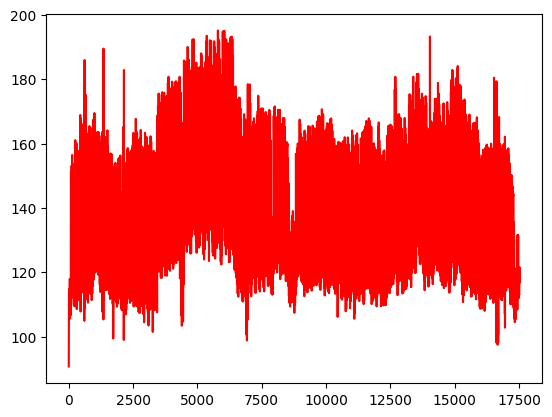

In [15]:
avg_series = dat[dat.columns.difference([dat.columns[i] for i in [153,161,773]])].mean(axis=1)
plt.plot(avg_series, "-r")

In [16]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [17]:
n_arimatrain = 14000
avgtrain = avg_series[:n_arimatrain]
avgtest = avg_series[n_arimatrain:]

In [18]:
# finds appropriate arima parameters automatically (but is slow)
# m1 = auto_arima(avgtrain, d=1)

In [19]:
#m1

NameError: name 'm1' is not defined

In [ ]:
plt.plot(np.arange(n_arimatrain), avgtrain)
plt.plot(np.arange(n_arimatrain,n_obs), avgtest)
plt.plot(np.arange(n_arimatrain,n_obs), m1.predict(n_periods=avgtest.shape[0]))

In [ ]:
plt.plot(m1.predict_in_sample() - avgtrain)
#plt.plot(m1.predict(n_periods=avgtest.shape[0]) - avgtest)

In [ ]:
def rmse(pred, real):
  return np.sqrt(((pred-real)**2).mean())

print(rmse(m1.predict_in_sample(), avgtrain), rmse(m1.predict(n_periods=avgtest.shape[0]), avgtest))

In [39]:
# compute metrics
def compute_metrics(true, pred):
    mae  = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred)
    r2   = r2_score(true, pred)
    ev   = explained_variance_score(true, pred)
    return mae, rmse, mape, r2, ev

In [ ]:
#plt.plot(dat[dat.columns[162]], "-r")

Text(0.5, 1.0, 'Panther')

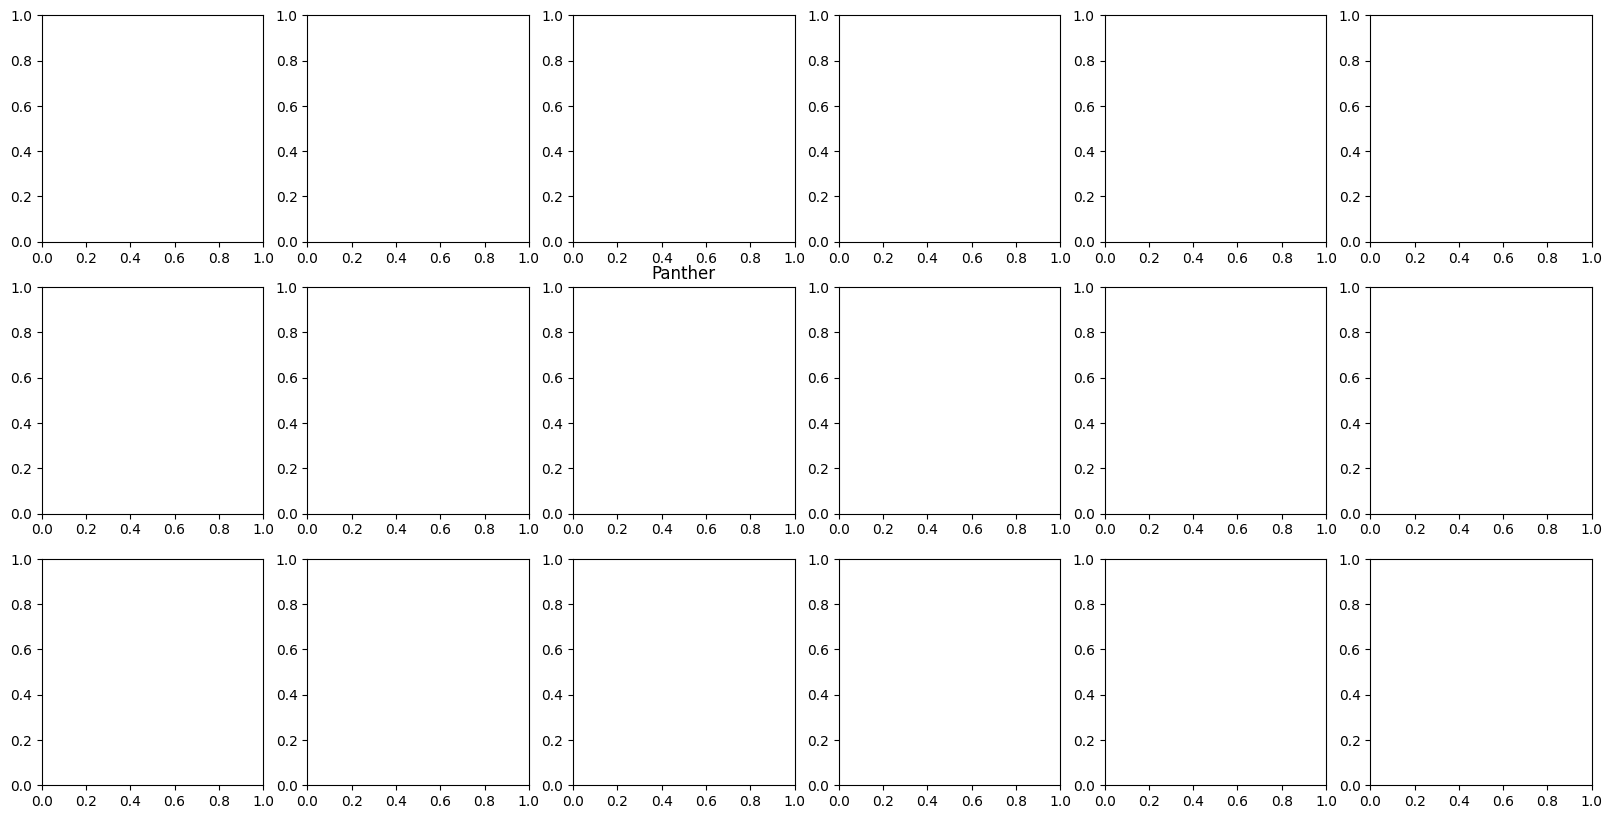

In [20]:
fig, ax = plt.subplots(3,6, figsize=(20,10))
ax[1,2].set_title("Panther")

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0109
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 9.0074e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 8.6453e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Cockatoo with units 10 =====
 Train →  MAE: 1.691, RMSE: 2.281, MAPE: 1.257%, R²: 0.984, ExplVar: 0.984
 Test  →  MAE: 1.694,  RMSE: 2.255,  MAPE: 1.287%,  R²: 0.984,  ExplVar: 0.984
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0103
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 9.1146e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 8.7101e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Cockatoo with units 25 =====
 Train →  MAE: 1.698, RMSE: 2.273, MAPE: 1.263%, R²: 0.984, ExplVar: 0.984
 Test  →  MAE: 1.702,  RMSE: 2.250,  MAPE: 1.293%,  R²: 0.984,  ExplVar: 0.984
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0069
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.0013
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0012
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Peacock with units 10 =====
 Train →  MAE: 2.415, RMSE: 3.410, MAPE: 1.382%, R²: 0.973, ExplVar: 0.974
 Test  →  MAE: 2.321,  RMSE: 3.354,  MAPE: 1.363%,  R²: 0.971,  ExplVar: 0.971
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0084
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.0012
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.0012
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Peacock with units 25 =====
 Train →  MAE: 2.374, RMSE: 3.328, MAPE: 1.359%, R²: 0.975, ExplVar: 0.975
 Test  →  MAE: 2.273,  RMSE: 3.284,  MAPE: 1.332%,  R²: 0.972,  ExplVar: 0.972
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0184
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 9.6791e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 8.8873e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Fox with units 10 =====
 Train →  MAE: 2.388, RMSE: 4.893, MAPE: 1.744%, R²: 0.910, ExplVar: 0.910
 Test  →  MAE: 2.363,  RMSE: 4.707,  MAPE: 1.687%,  R²: 0.925,  ExplVar: 0.925
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0062
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 9.4518e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 8.7737e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Fox with units 25 =====
 Train →  MAE: 2.332, RMSE: 4.817, MAPE: 1.714%, R²: 0.913, ExplVar: 0.913
 Test  →  MAE: 2.309,  RMSE: 4.641,  MAPE: 1.654%,  R²: 0.927,  ExplVar: 0.927
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0091
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 8.7263e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 7.9324e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Lamb with units 10 =====
 Train →  MAE: 1.047, RMSE: 1.650, MAPE: 677.935%, R²: 0.984, ExplVar: 0.984
 Test  →  MAE: 1.176,  RMSE: 1.706,  MAPE: 7.542%,  R²: 0.955,  ExplVar: 0.958
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0070
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 8.4497e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 7.4697e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Lamb with units 25 =====
 Train →  MAE: 0.969, RMSE: 1.571, MAPE: 125.398%, R²: 0.986, ExplVar: 0.986
 Test  →  MAE: 1.117,  RMSE: 1.626,  MAPE: 7.219%,  R²: 0.959,  ExplVar: 0.960
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0030
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.0018
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.0018
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Bobcat with units 10 =====
 Train →  MAE: 4.504, RMSE: 6.881, MAPE: 6.629%, R²: 0.864, ExplVar: 0.875
 Test  →  MAE: 5.468,  RMSE: 8.308,  MAPE: 8.326%,  R²: 0.785,  ExplVar: 0.798
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0040
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.0018
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0018
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Bobcat with units 25 =====
 Train →  MAE: 4.456, RMSE: 6.867, MAPE: 6.547%, R²: 0.865, ExplVar: 0.874
 Test  →  MAE: 5.393,  RMSE: 8.284,  MAPE: 8.198%,  R²: 0.786,  ExplVar: 0.798
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0117
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0010
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 9.4781e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Wolf with units 10 =====
 Train →  MAE: 3.463, RMSE: 4.677, MAPE: 3.779%, R²: 0.980, ExplVar: 0.981
 Test  →  MAE: 3.592,  RMSE: 5.159,  MAPE: 4.056%,  R²: 0.974,  ExplVar: 0.976
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0083
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0010
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 9.6518e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Wolf with units 25 =====
 Train →  MAE: 3.978, RMSE: 5.180, MAPE: 4.295%, R²: 0.976, ExplVar: 0.981
 Test  →  MAE: 4.027,  RMSE: 5.609,  MAPE: 4.458%,  R²: 0.969,  ExplVar: 0.975
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0071
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 5.0276e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 4.7144e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Bear with units 10 =====
 Train →  MAE: 2.023, RMSE: 2.777, MAPE: 1.127%, R²: 0.988, ExplVar: 0.988
 Test  →  MAE: 2.094,  RMSE: 2.755,  MAPE: 1.132%,  R²: 0.990,  ExplVar: 0.990
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0055
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.7785e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 4.3598e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Bear with units 25 =====
 Train →  MAE: 1.979, RMSE: 2.673, MAPE: 1.104%, R²: 0.989, ExplVar: 0.990
 Test  →  MAE: 2.039,  RMSE: 2.680,  MAPE: 1.103%,  R²: 0.991,  ExplVar: 0.991
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0152
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0061
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0059
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Mouse with units 10 =====
 Train →  MAE: 27.966, RMSE: 41.272, MAPE: 9.981%, R²: 0.662, ExplVar: 0.664
 Test  →  MAE: 47.998,  RMSE: 57.453,  MAPE: 16789514153398077440.000%,  R²: 0.782,  ExplVar: 0.887
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0081
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0061
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.0053
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Mouse with units 25 =====
 Train →  MAE: 24.346, RMSE: 36.788, MAPE: 8.855%, R²: 0.732, ExplVar: 0.732
 Test  →  MAE: 58.280,  RMSE: 71.700,  MAPE: 21439369066130386944.000%,  R²: 0.661,  ExplVar: 0.836
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0028
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 3.2619e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 3.8235e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Panther with units 10 =====
 Train →  MAE: 1.662, RMSE: 3.767, MAPE: 11343916853190418.000%, R²: 0.993, ExplVar: 0.994
 Test  →  MAE: 2.163,  RMSE: 2.892,  MAPE: 1.996%,  R²: 0.947,  ExplVar: 0.957
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0041
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 4.7732e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 5.3261e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Panther with units 25 =====
 Train →  MAE: 1.583, RMSE: 3.989, MAPE: 11974102919757754.000%, R²: 0.993, ExplVar: 0.993
 Test  →  MAE: 2.072,  RMSE: 2.814,  MAPE: 1.909%,  R²: 0.950,  ExplVar: 0.957
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0084
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 3.6869e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.3546e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Gator with units 10 =====
 Train →  MAE: 0.737, RMSE: 2.182, MAPE: 1.083%, R²: 0.962, ExplVar: 0.964
 Test  →  MAE: 0.501,  RMSE: 1.776,  MAPE: 0.837%,  R²: 0.950,  ExplVar: 0.951
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0023
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 3.6400e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 3.4800e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Gator with units 25 =====
 Train →  MAE: 0.775, RMSE: 2.194, MAPE: 1.111%, R²: 0.962, ExplVar: 0.964
 Test  →  MAE: 0.523,  RMSE: 1.782,  MAPE: 0.858%,  R²: 0.950,  ExplVar: 0.951
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0058
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 3.9139e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 3.8096e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Rat with units 10 =====
 Train →  MAE: 2.467, RMSE: 3.237, MAPE: 2.024%, R²: 0.981, ExplVar: 0.988
 Test  →  MAE: 1.721,  RMSE: 2.412,  MAPE: 1.674%,  R²: 0.981,  ExplVar: 0.983
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0046
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 4.0029e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.7856e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Rat with units 25 =====
 Train →  MAE: 2.308, RMSE: 3.057, MAPE: 1.903%, R²: 0.983, ExplVar: 0.988
 Test  →  MAE: 1.689,  RMSE: 2.385,  MAPE: 1.656%,  R²: 0.982,  ExplVar: 0.983
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0117
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 9.1564e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 8.6059e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Crow with units 10 =====
 Train →  MAE: 7.180, RMSE: 11.603, MAPE: 2.912%, R²: 0.972, ExplVar: 0.975
 Test  →  MAE: 6.006,  RMSE: 10.432,  MAPE: 2.227%,  R²: 0.976,  ExplVar: 0.979
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0056
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 8.8598e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 8.4775e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Crow with units 25 =====
 Train →  MAE: 7.391, RMSE: 11.778, MAPE: 2.988%, R²: 0.971, ExplVar: 0.974
 Test  →  MAE: 6.154,  RMSE: 10.567,  MAPE: 2.281%,  R²: 0.975,  ExplVar: 0.979
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0181
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0030
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0027
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Moose with units 10 =====
 Train →  MAE: 16.776, RMSE: 31.709, MAPE: 3.002%, R²: 0.958, ExplVar: 0.958
 Test  →  MAE: 16.574,  RMSE: 30.327,  MAPE: 2.511%,  R²: 0.948,  ExplVar: 0.953
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0118
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.0029
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.0026
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Moose with units 25 =====
 Train →  MAE: 16.442, RMSE: 31.473, MAPE: 2.981%, R²: 0.958, ExplVar: 0.959
 Test  →  MAE: 15.312,  RMSE: 29.273,  MAPE: 2.339%,  R²: 0.951,  ExplVar: 0.954
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0104
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 3.5805e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 3.2829e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Robin with units 10 =====
 Train →  MAE: 2.027, RMSE: 3.155, MAPE: 1.328%, R²: 0.986, ExplVar: 0.986
 Test  →  MAE: 1.962,  RMSE: 3.257,  MAPE: 1.312%,  R²: 0.984,  ExplVar: 0.984
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0048
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.5693e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.3759e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Robin with units 25 =====
 Train →  MAE: 2.092, RMSE: 3.207, MAPE: 1.372%, R²: 0.985, ExplVar: 0.985
 Test  →  MAE: 2.073,  RMSE: 3.338,  MAPE: 1.385%,  R²: 0.983,  ExplVar: 0.983
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0048
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.8252e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 3.4217e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
===== Metrics for Shrew with units 10 =====
 Train →  MAE: 3.222, RMSE: 4.799, MAPE: 180182438031735840.000%, R²: 0.996, ExplVar: 0.996
 Test  →  MAE: 1.773,  RMSE: 1.773,  MAPE: 798413341731331456.000%,  R²: 0.000,  ExplVar: 0.000
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0089
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 3.7733e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 3.4953e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Shrew with units 25 =====
 Train →  MAE: 3.238, RMSE: 4.868, MAPE: 164382627895612064.000%, R²: 0.996, ExplVar: 0.996
 Test  →  MAE: 1.617,  RMSE: 1.617,  MAPE: 728435735746276864.000%,  R²: 0.000,  ExplVar: 0.000
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0129
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.0024
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0023
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Eagle with units 10 =====
 Train →  MAE: 6.065, RMSE: 11.064, MAPE: 4.526%, R²: 0.822, ExplVar: 0.845
 Test  →  MAE: 5.762,  RMSE: 8.831,  MAPE: 3.573%,  R²: 0.864,  ExplVar: 0.896
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0142
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.0024
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0023
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Eagle with units 25 =====
 Train →  MAE: 5.962, RMSE: 10.917, MAPE: 4.434%, R²: 0.827, ExplVar: 0.852
 Test  →  MAE: 5.691,  RMSE: 8.659,  MAPE: 3.546%,  R²: 0.869,  ExplVar: 0.904
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0053
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 4.3487e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 3.9279e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Hog with units 10 =====
 Train →  MAE: 5.049, RMSE: 8.985, MAPE: 2.189%, R²: 0.971, ExplVar: 0.976
 Test  →  MAE: 5.023,  RMSE: 8.244,  MAPE: 2.169%,  R²: 0.972,  ExplVar: 0.979
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.0028
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 4.1782e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 4.0108e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Hog with units 25 =====
 Train →  MAE: 4.933, RMSE: 8.917, MAPE: 2.123%, R²: 0.971, ExplVar: 0.977
 Test  →  MAE: 4.991,  RMSE: 8.198,  MAPE: 2.146%,  R²: 0.972,  ExplVar: 0.979
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0016
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 9.9535e-04
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 9.5114e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Bull with units 10 =====
 Train →  MAE: 7.828, RMSE: 23.611, MAPE: 370280356661614336.000%, R²: 0.549, ExplVar: 0.550
 Test  →  MAE: 9.356,  RMSE: 32.206,  MAPE: 657749304556852736.000%,  R²: 0.399,  ExplVar: 0.400
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14012/14012 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0015
Epoch 2/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0010
Epoch 3/3
14012/14012 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 9.3071e-04
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
===== Metrics for Bull with units 25 =====
 Train →  MAE: 7.878, RMSE: 23.274, MAPE: 367809068497587648.000%, R²: 0.562, ExplVar: 0.562
 Test  →  MAE: 9.366,  RMSE: 31.547,  MAPE: 639971093784492160.000%,  R²: 0.424,  ExplVar: 0.424


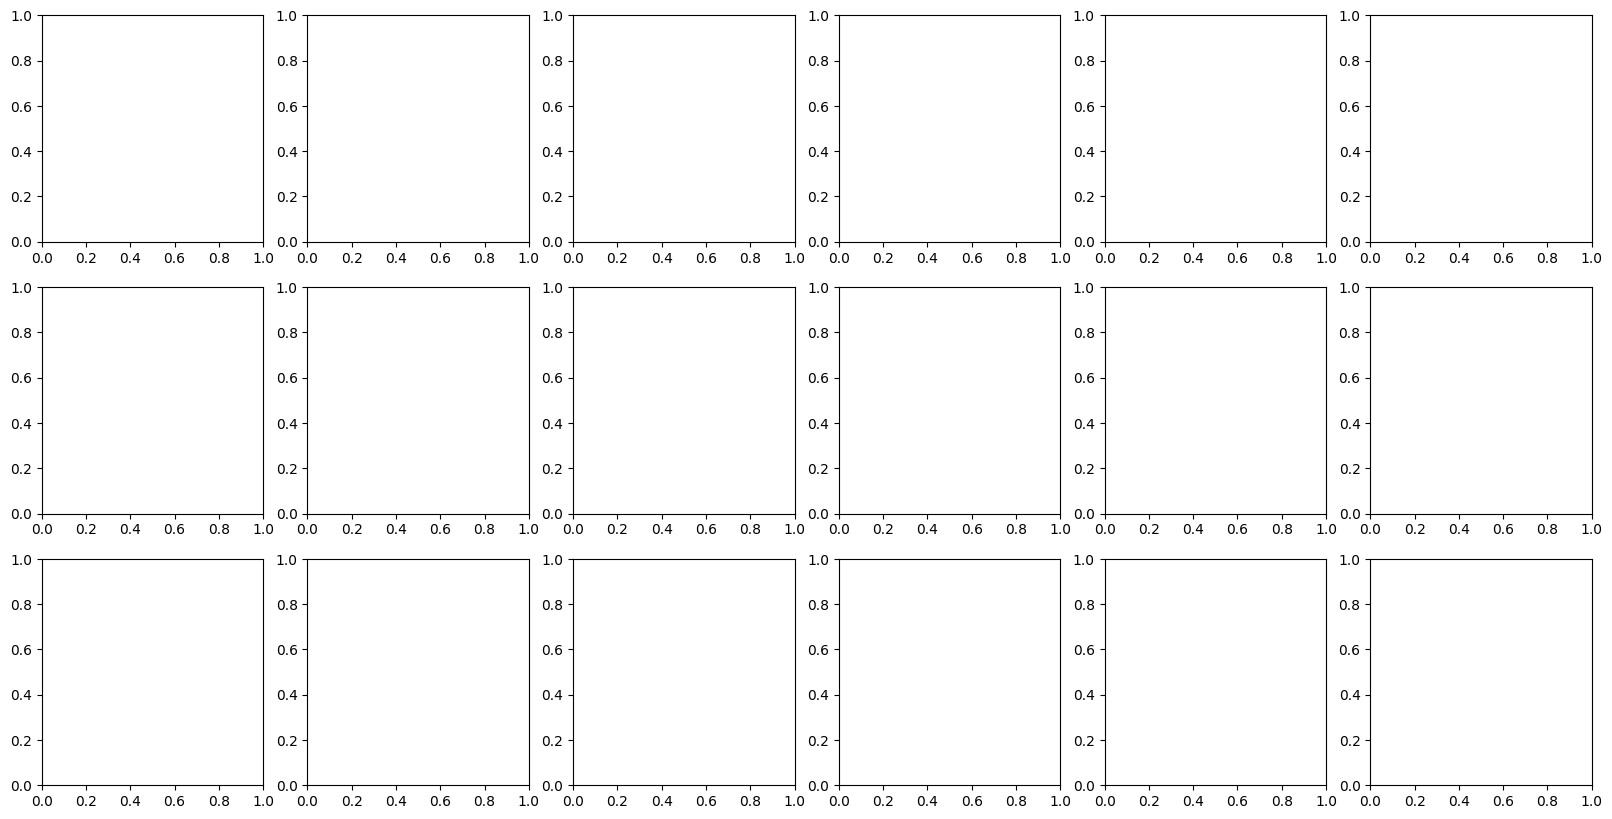

In [75]:

# compute metrics
def compute_metrics(true, pred):
    mae  = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = mean_absolute_percentage_error(true, pred)
    r2   = r2_score(true, pred)
    ev   = explained_variance_score(true, pred)
    return mae, rmse, mape, r2, ev

fig, ax = plt.subplots(3,6, figsize=(20,10))
locations = list(set([name[0] for name in names]))

models10 = dict([])
models25 = dict([])
test10 = dict([])
test25 = dict([])
models = {10: models10, 25: models25}
test = {10: test10, 25: test25}

for i in range(len(locations)):
  # LSTM is sensitive to scale
  avg_series = sub_dfs[locations[i]].mean(axis=1)
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_series = scaler.fit_transform(np.array(avg_series).reshape(-1, 1))

  train_size = int(n_obs * 0.8)
  train_scaled = scaled_series[:train_size]
  test_scaled = scaled_series[train_size:]


  # Y is the sequence; for every element of Y, X has a list with the previous look_back entries
  def create_dataset(dataset, look_back=1):
      X, Y = [], []
      for i in range(len(dataset) - look_back - 1):
          a = dataset[i:(i + look_back), 0]
          X.append(a)
          Y.append(dataset[i + look_back, 0])
      return np.array(X), np.array(Y)

  look_back = 4       # informed by arimax giving p = 3, or 4 with small coefficient

  X_train, Y_train = create_dataset(train_scaled, look_back)
  X_test, Y_test = create_dataset(test_scaled, look_back)

  # Reshape input to be [samples, time steps, features] which is required for LSTM
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

  # Building the LSTM model
  for u in [10,25]:
    model = Sequential()
    model.add(LSTM(units=u, input_shape=(X_train.shape[1], 1)))
    #model.add(LSTM(units=25))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=3, batch_size=1, verbose=1)
    models[u][locations[i]] = model

    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions to original scale
    train_predict = scaler.inverse_transform(train_predict)
    real_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    real_test = scaler.inverse_transform([Y_test])

    # flatten everything
    y_train_true  = real_train.flatten()
    y_train_pred  = train_predict.flatten()
    y_test_true   = real_test.flatten()
    y_test_pred   = test_predict.flatten()

    #ax[i//6,i%6].plot(y_test_true - y_test_pred)
    #ax[i//6,i%6].set_title(locations[i])

    train_mae, train_rmse, train_mape, train_r2, train_ev = compute_metrics(y_train_true, y_train_pred)
    test_mae,  test_rmse,  test_mape,  test_r2,  test_ev  = compute_metrics(y_test_true,  y_test_pred)
    test[u][locations[i]] = test_rmse

    # print or log them per building
    print(f"===== Metrics for {locations[i]} with units {u} =====")
    print(f" Train →  MAE: {train_mae:.3f}, RMSE: {train_rmse:.3f}, MAPE: {train_mape:.3%}, R²: {train_r2:.3f}, ExplVar: {train_ev:.3f}")
    print(f" Test  →  MAE: {test_mae:.3f},  RMSE: {test_rmse:.3f},  MAPE: {test_mape:.3%},  R²: {test_r2:.3f},  ExplVar: {test_ev:.3f}")

In [87]:
np.array(list(test10.values())) - np.array(list(test25.values()))

array([ 5.33774928e-03,  7.00774754e-02,  6.59545219e-02,  8.02256494e-02,
        2.39119247e-02, -4.49988407e-01,  7.53394656e-02, -1.42469649e+01,
        7.84599355e-02, -5.96353745e-03,  2.71054048e-02, -1.34452580e-01,
        1.05396488e+00, -8.10369409e-02,  1.55381499e-01,  1.71627046e-01,
        4.53262171e-02,  6.58564084e-01])

In [88]:
test10

{'Cockatoo': 2.255026653161777,
 'Peacock': 3.3537384262253433,
 'Fox': 4.707138238370995,
 'Lamb': 1.7058380393188253,
 'Bobcat': 8.307603931000294,
 'Wolf': 5.159144542663264,
 'Bear': 2.7549174093844186,
 'Mouse': 57.45317667825827,
 'Panther': 2.891991864069972,
 'Gator': 1.7758899698453352,
 'Rat': 2.4116661859767894,
 'Crow': 10.432328053686192,
 'Moose': 30.327003642391265,
 'Robin': 3.25669132769237,
 'Shrew': 1.772833750316233,
 'Eagle': 8.830838200782473,
 'Hog': 8.243574543545853,
 'Bull': 32.205827991849695}

In [91]:
test25

{'Cockatoo': 2.249688903883138,
 'Peacock': 3.2836609508734256,
 'Fox': 4.641183716478198,
 'Lamb': 1.625612389942972,
 'Bobcat': 8.283692006345289,
 'Wolf': 5.609132949671417,
 'Bear': 2.6795779437668963,
 'Mouse': 71.70014154732029,
 'Panther': 2.8135319285873464,
 'Gator': 1.781853507296024,
 'Rat': 2.384560781192702,
 'Crow': 10.566780633749763,
 'Moose': 29.273038764056356,
 'Robin': 3.3377282686374588,
 'Shrew': 1.6174522515708658,
 'Eagle': 8.659211154291123,
 'Hog': 8.19824832647783,
 'Bull': 31.54726390775936}

In [98]:
better_model = dict([])
for i in locations:
  if test10[i] < test25[i]:
    better_model[i] = models[10][i]
    print(i)
  else:
    better_model[i] = models[25][i]

Wolf
Mouse
Gator
Crow
Robin


548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Bobcat_lodging_Darin  →  MAE: 8.510,  RMSE: 13.322,  MAPE: 7.970%,  R²: 0.844,  ExplVar: 0.848
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Fox_education_Wendell  →  MAE: 6.920,  RMSE: 18.555,  MAPE: 22499036002127808.000%,  R²: 0.777,  ExplVar: 0.786
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Bull_education_Mervin  →  MAE: 10.767,  RMSE: 19.364,  MAPE: 512047748561254976.000%,  R²: 0.780,  ExplVar: 0.782
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Lamb_assembly_Corliss  →  MAE: 1.870,  RMSE: 3.732,  MAPE: 638918115984993.500%,  R²: 0.884,  ExplVar: 0.887
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Fox_education_Vernon  →  MAE: 25.103,  RMSE: 26.814,  MAPE: 1524563148264718592.000%,  R²: -0.064,  ExplVar: 0.793
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Bull_office_Anne  →  MAE: 3.222,  RMSE: 3.751,  MAPE: 36384626623979416.000%,  R²: 0.005,  ExplVar: 0.655
548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
 Bear_parking_Gordon  →  MAE: 0.177,  RMSE: 0.307,  MAPE

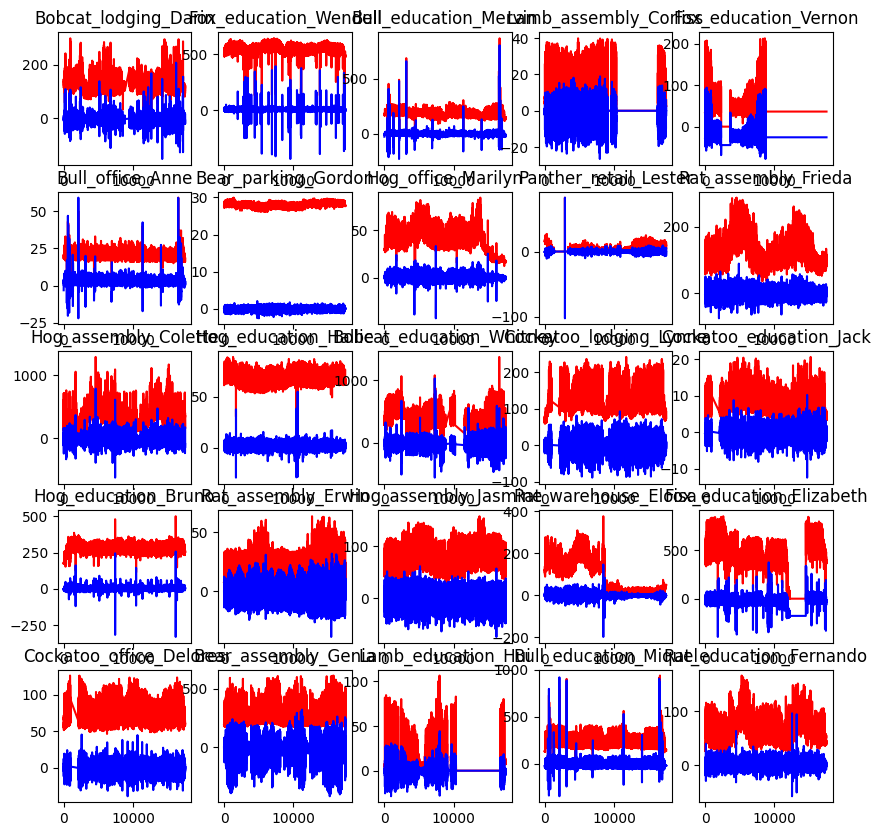

In [101]:
# repeat this cell to get a bit of validation data, which are those of individual buildings
import random
random.seed(123)

fig, ax = plt.subplots(5,5, figsize=(10,10))
for i in range(25):
  # grab the correct scaler since LSTMs care about scaling
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler.fit_transform(np.array(sub_dfs[location]).reshape(-1, 1))

  samp = random.choice(dat.columns)
  scaled_seq = scaler.fit_transform(np.array(dat[samp]).reshape(-1, 1))
  X_val, Y_val = create_dataset(scaled_seq, look_back)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
  location = samp.split("_")[0]
  val_predict = better_model[location].predict(X_val)

  val_predict = scaler.inverse_transform(val_predict)
  Y_val = scaler.inverse_transform([Y_val])

  # plot series, prediction and diff
  ax[i//5,i%5].plot(Y_val.flatten(), color="r")
  #ax[i//5,i%5].plot(val_predict.flatten(), color="g")
  ax[i//5,i%5].plot(Y_val.flatten() - val_predict.flatten(), color="b")
  ax[i//5,i%5].set_title(samp)

  val_mae, val_rmse, val_mape, val_r2, val_ev = compute_metrics(Y_val.flatten(), val_predict)
  print(f" {samp}  →  MAE: {val_mae:.3f},  RMSE: {val_rmse:.3f},  MAPE: {val_mape:.3%},  R²: {val_r2:.3f},  ExplVar: {val_ev:.3f}")

548/548 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(0.5, 1.0, 'Bear_education_Bulah')

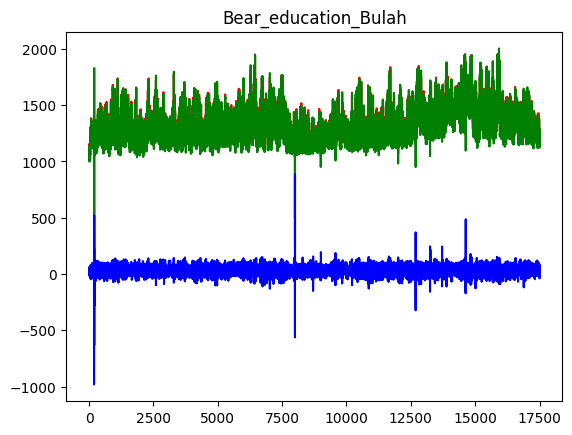

In [97]:
samp = "Bear_education_Bulah"

# grab the correct scaler since LSTMs care about scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(np.array(sub_dfs[location]).reshape(-1, 1))

scaled_seq = scaler.fit_transform(np.array(dat[samp]).reshape(-1, 1))
X_val, Y_val = create_dataset(scaled_seq, look_back)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
location = samp.split("_")[0]
val_predict = better_model[location].predict(X_val)

val_predict = scaler.inverse_transform(val_predict)
Y_val = scaler.inverse_transform([Y_val])

  # plot series, prediction and diff
plt.plot(Y_val.flatten(), color="r")
plt.plot(val_predict.flatten(), color="g")
plt.plot(Y_val.flatten() - val_predict.flatten(), color="b")
plt.title(samp)


In [67]:
val_mae, val_rmse, val_mape, val_r2, val_ev = compute_metrics(Y_val.flatten(), val_predict)
print(f" Val  →  MAE: {val_mae:.3f},  RMSE: {val_rmse:.3f},  MAPE: {val_mape:.3%},  R²: {val_r2:.3f},  ExplVar: {val_ev:.3f}")

 Val  →  MAE: 5.242,  RMSE: 9.585,  MAPE: 1.953%,  R²: 0.927,  ExplVar: 0.928


In [69]:
dat["Hog_assembly_Una"]

,Hog_assembly_Una
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17517,0.0
17518,0.0
17519,0.0
17520,0.0


In [26]:
rmse(test_predict, Y_test[0])

NameError: name 'rmse' is not defined

In [ ]:
plt.plot(Y_test[0])

In [ ]:
plt.plot(test_predict)

In [ ]:
plt.plot(Y_test[0].flatten() - test_predict.flatten())

In [ ]:
for i in range(10):
  plt.plot([1,2,3],[i,i+1,i+2])
  plt.show()

In [ ]:
# determining whether first-order differencing suffices to make the series stationary (it does)
def avgdiffsc(series):
  diff = np.diff(series)
  return np.mean(diff[~np.isnan(diff)]) / np.max(series[~np.isnan(series)])

avgdiffs = dat[dat.columns.difference(["timestamp"])].apply(avgdiffsc)
avgdiffs

In [ ]:
max(avgdiffs)

In [ ]:
dat.mean(axis=1)